![picture](https://minerador.es/wp-content/uploads/2020/10/sticky-lg.png)

# Python Analytics #8 | **Projetos de Analytics em Python**
*Prof. Orlando Junior*

---

**Conteúdo**

1. Workflow de *analytics*
2. Identificação do problema
3. Coleta dos dados
4. Pré-processamento dos dados
5. Análise dos dados
6. Exercícios

---

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
from sklearn.linear_model import LinearRegression

## Workflow de *analytics*


**Processo**: conjunto de etapas subsequentes para desenvolver, implementar e operar aplicações de *analytics* em uma organização.

![picture](https://blogs.sas.com/content/sgf/files/2019/05/AnylticsProcesModal.png)

**Resumo das etapas**

1. **Identifique o problema:** descreva de maneira clara e não ambígua o problema que será resolvido e os objetivos da aplicação.

2. **Colete os dados:** identifique todas as fontes de dados de potencial interesse e realize análises exploratórias para observar os dados.

3. **Pré-processe os dados:** transforme e consolide os dados para serem utilizados de maneira adequada, seja para serem armazenados, seja em modelos estatísticos.

4. **Analise os dados:** aplique técnicas estatísticas adequadas ao problema que está sendo resolvido sobre os dados pré-processados e transformados.

5. **Interprete os resultados:** colete os resultados e interprete-os conforme o objetivo da aplicação.

## Identificação do problema

**Problema:** uma imobiliária deseja oferecer às construtoras da sua cidade um sistema automatizado para a precificação de imóveis da região (Califórnia) a fim de viabilizar novos investimentos. Como avaliar o preço dos imóveis da região?

**Objetivo:** analisar os preços dos imóveis da região da imobiliária e estimar o preço ótimo para novos imóveis.

**Fonte de dados:** censo dos imóveis da Califória, de 1990. Cada registro corresponde a um bloco de imóveis (bairro) da região.

**Características dos dados disponíveis:**
* Latitude (norte) e longitude (oeste)
* Idade mediana das construções no bloco
* Quantidade total de cômodos e quartos dentro de um bloco
* Quantidade de pessoas morando no bloco
* Renda mediana média familiar do bloco
* Valor mediano do imóvel no bloco
* Proximidade com o oceano


**Mais informações:** https://www.kaggle.com/camnugent/california-housing-prices

![picture](https://www.worldatlas.com/r/w1200/upload/c4/c6/81/ca-01.png)

**Pipeline de dados para avaliar o preço dos imóveis**

![picture](https://minerador.es/wp-content/uploads/2021/06/pipeline-realstate.png)

## Coleta dos dados

**Observação do conjunto de dados**

In [92]:
housing = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')

In [93]:
# Observação dos dados
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Exercício:** observe a estrutura do conjunto de dados carregado.

In [94]:
# Estatísticas dos dados
## Observação da contagem (valores ausentes)
stats = housing.describe()
stats.T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


**Gráfico da Califórnia**

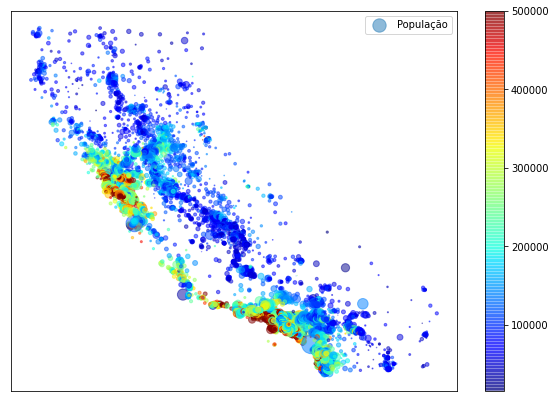

In [7]:
# Cores: valor mediano dos imóveis
# Tamanho: população
housing.plot(figsize=(10,7), kind='scatter', 
             x='longitude', y='latitude', label='População',
             s=housing['population']/100, c=housing['median_house_value'],
             cmap=plt.get_cmap('jet'), alpha=0.5, colorbar=True)
plt.legend()
plt.xlabel(None)
plt.ylabel(None)
plt.xticks([])
plt.yticks([])
plt.minorticks_off()
plt.legend()
plt.show()

**Exploração de variáveis numéricas**

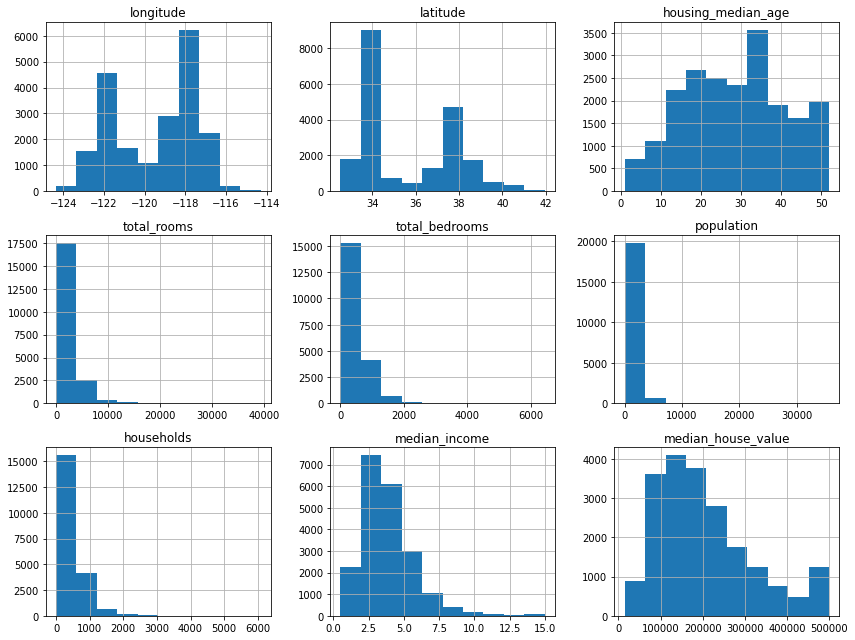

In [67]:
housing.hist(figsize=(12, 9))
plt.tight_layout()
plt.show()

**Exploração da renda mediana**

In [9]:
# Estatísticas
stats['median_income']

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [95]:
renda_categorias = ['baixa classe média', 'média classe média', 'alta classe média', 'baixa classe alta', 'alta classe alta']
median_income_cat = pd.cut(housing.median_income, bins=5, labels=renda_categorias)
median_income_cat

0         alta classe média
1         alta classe média
2         alta classe média
3        média classe média
4        média classe média
                ...        
20635    baixa classe média
20636    baixa classe média
20637    baixa classe média
20638    baixa classe média
20639    baixa classe média
Name: median_income, Length: 20640, dtype: category
Categories (5, object): ['baixa classe média' < 'média classe média' < 'alta classe média' <
                         'baixa classe alta' < 'alta classe alta']

In [11]:
median_income_cat.value_counts()

baixa classe média    9683
média classe média    9088
alta classe média     1488
baixa classe alta      271
alta classe alta       110
Name: median_income, dtype: int64

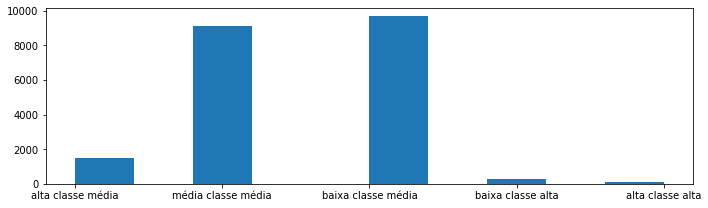

In [12]:
median_income_cat.hist(grid=False, figsize=(10, 3))
plt.tight_layout()
plt.show()

**Exploração do valor mediano do imóvel**

In [13]:
# Estatísticas
stats['median_house_value']

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

**Exercício:** plote o gráfico de densidade para o valor mediano dos imóveis.

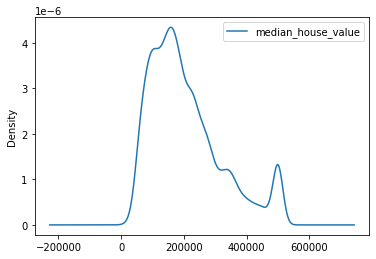

In [14]:
data = housing['median_house_value']
df=pd.DataFrame(data)
df.plot(kind='density')
plt.show()

**Exploração da idade mediana do imóvel**

In [96]:
# Estatísticas
stats['housing_median_age']

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

**Exercício:** plote o gráfico de histograma com densidade para a idade mediana dos imóveis.

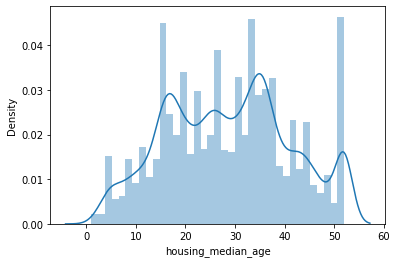

In [16]:
#idade_mediana = housing['housing_median_age'].hist(bins=20)
import scipy.stats as st
sns.distplot(housing.housing_median_age);



**Exploração da proximidade do imóvel com o oceano**

In [17]:
# Frequência da variável
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

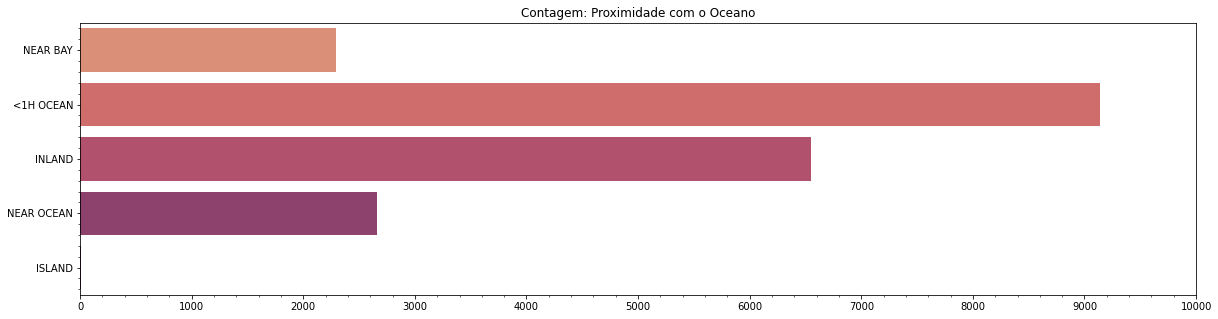

In [18]:
# Gráfico de contagem
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(data=housing, y="ocean_proximity", palette="flare")
plt.title("Contagem: Proximidade com o Oceano")
plt.xticks(np.arange(0, 10001, 1000))
plt.minorticks_on()
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Exercício:** plote o gráfico de dispersão entre a renda mediana e o valor mediano do imóvel.

In [73]:
ocean_proximity = set(housing['ocean_proximity'])
ocean_proximity

{'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'}

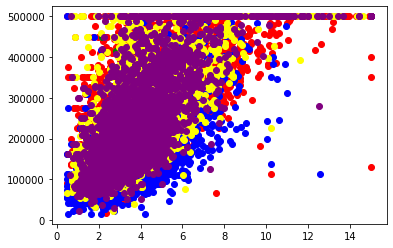

In [84]:
X_OCEAN = housing[housing['ocean_proximity'] == '<1H OCEAN']['median_income']
X_INLAND = housing[housing['ocean_proximity'] == 'INLAND']['median_income']
X_ISLAND = housing[housing['ocean_proximity'] == 'ISLAND']['median_income']
X_NEARBAY = housing[housing['ocean_proximity'] == 'NEAR BAY']['median_income']
X_NEAROCEAN = housing[housing['ocean_proximity'] == 'NEAR OCEAN']['median_income']

Y_OCEAN = housing[housing['ocean_proximity'] == '<1H OCEAN']['median_house_value']
Y_INLAND = housing[housing['ocean_proximity'] == 'INLAND']['median_house_value']
Y_ISLAND = housing[housing['ocean_proximity'] == 'ISLAND']['median_house_value']
Y_NEARBAY = housing[housing['ocean_proximity'] == 'NEAR BAY']['median_house_value']
Y_NEAROCEAN = housing[housing['ocean_proximity'] == 'NEAR OCEAN']['median_house_value']

plt.scatter(X_OCEAN, Y_OCEAN, c='red')
plt.scatter(X_INLAND, Y_INLAND, c='blue')
plt.scatter(X_ISLAND, Y_ISLAND, c='green')
plt.scatter(X_NEARBAY, Y_NEARBAY, c='yellow')
plt.scatter(X_NEAROCEAN, Y_NEAROCEAN, c='purple')

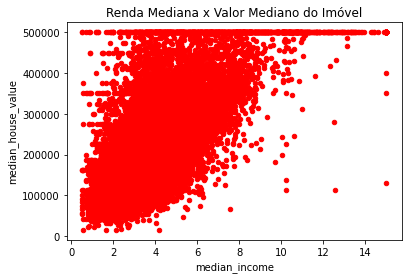

In [76]:
housing.plot(x='median_income',
             y='median_house_value',
             kind='scatter',
             title='Renda Mediana x Valor Mediano do Imóvel',
             color='red')


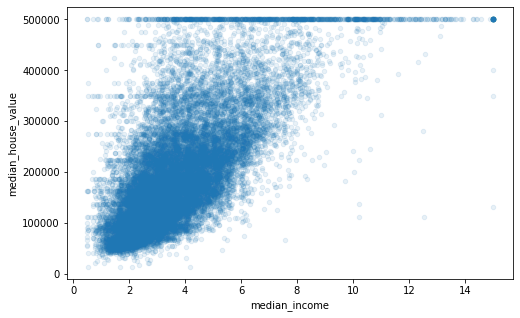

In [20]:
housing.plot(kind='scatter',
             x='median_income',
             y='median_house_value',
             alpha=0.1,
             figsize=(8,5))

**Exercício:** plote o gráfico de dispersão entre o valor mediano e a idade mediana.

In [109]:
housing_sample = housing.sample(frac=0.1, replace=True, random_state=1) #50% #random_state seria o seed
#ousing_sample

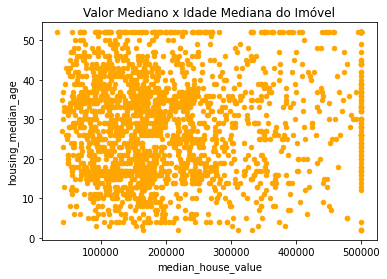

In [110]:
housing_sample.plot(x='median_house_value',
             y='housing_median_age',
             kind='scatter',
             title='Valor Mediano x Idade Mediana do Imóvel',
             color='orange');

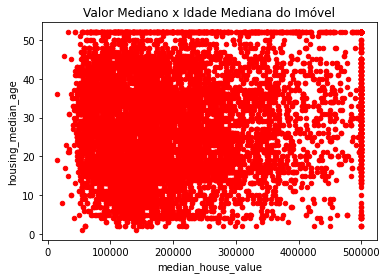

In [105]:
housing.plot(x='median_house_value',
             y='housing_median_age',
             kind='scatter',
             title='Valor Mediano x Idade Mediana do Imóvel',
             color='r');

**Exercício:** calcule a correlação entre as variáveis numéricas e apresente um mapa de calor.

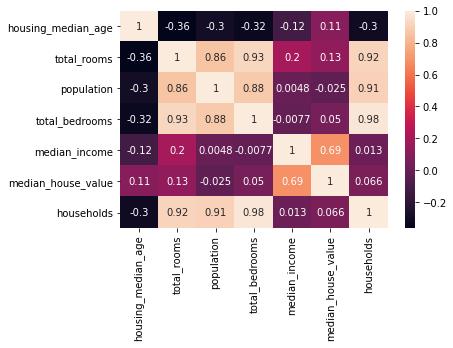

In [23]:
housing.corr()
df = housing[['housing_median_age', 'total_rooms', 'population', 'total_bedrooms', 'median_income', 'median_house_value', 'households']].corr()
sns.heatmap(df, annot=True);

In [24]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

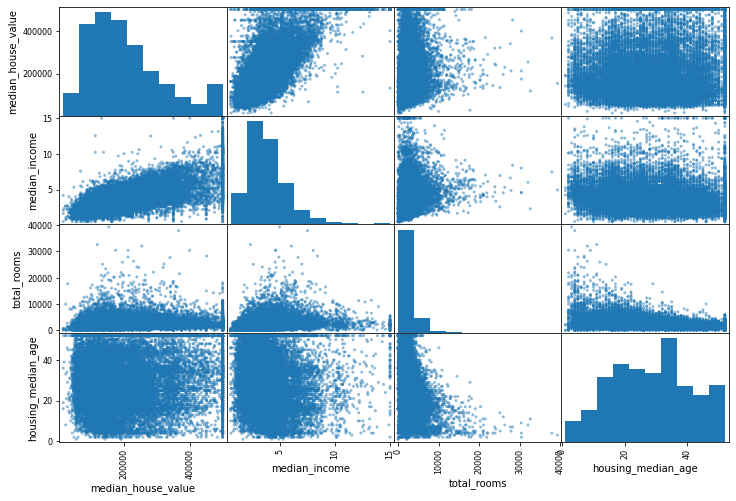

In [25]:
from pandas.plotting import scatter_matrix

variaveis = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[variaveis],
               figsize=(12,8));

**Exercício:** plote um gráfico relacionando o preço do imóvel com a quantidade de quartos.

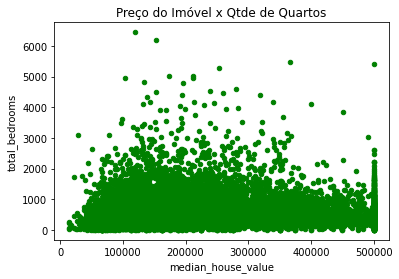

In [26]:
housing.plot(x='median_house_value',
             y='total_bedrooms',
             kind='scatter',
             title='Preço do Imóvel x Qtde de Quartos',
             color='g');

No handles with labels found to put in legend.


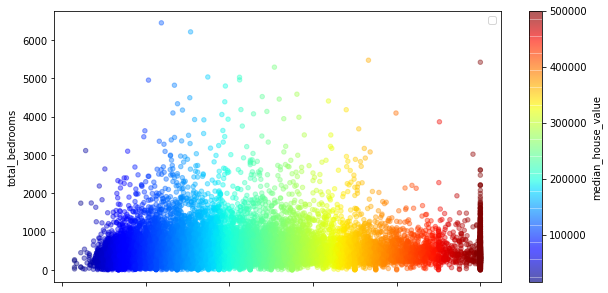

In [27]:
housing.plot(kind="scatter", x="median_house_value", y="total_bedrooms", alpha=0.4,
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            figsize=(10,5))
plt.legend();

**Conclusões**
* As variáveis estão em escalas diferentes entre si, o que pode atrapalhar durante a modelagem.
* A variável `median_house_value`(valor mediano dos imóveis) tem um pico repentino de 500001, o qual podemos considerar como *outlier*.
* A variável `median_income` (renda mediana) tem média igual a 3.87 dólares e valores entre 0.5 e 15.0, o que indica que os dados foram dimensionados previamente.
* A variável `housing_median_age` (idade mediana dos imóveis) também parece ter seu valor limitado.
* Observando `ocean_proximity`, verificamos que a maior parte dos imóveis está no continente ou a até 1 hora do oceano.

**Exercício:** descreva suas conclusões a partir da análise exploratória.
* Conclusão...
* Conclusão...
* Conclusão...
* Conclusão...

## Pré-processamento dos dados

**Cria categorias de rendas**: uma vez que a variável de renda é um valor numérico contínuo e muito importante, queremos tornar a variável mais representativa em todo o conjunto de dados.

In [28]:
# Cria caixas de 10 categorias
median_income_cat = pd.cut(housing.median_income, bins=10)
median_income_cat

0          (7.75, 9.2]
1          (7.75, 9.2]
2          (6.3, 7.75]
3          (4.85, 6.3]
4          (3.4, 4.85]
             ...      
20635    (0.485, 1.95]
20636      (1.95, 3.4]
20637    (0.485, 1.95]
20638    (0.485, 1.95]
20639      (1.95, 3.4]
Name: median_income, Length: 20640, dtype: category
Categories (10, interval[float64]): [(0.485, 1.95] < (1.95, 3.4] < (3.4, 4.85] < (4.85, 6.3] < ... <
                                     (9.2, 10.65] < (10.65, 12.1] < (12.1, 13.55] < (13.55, 15.0]]

In [29]:
# Reduz a 5 categorias, junto as categorias 6-10 na 5ª
median_income_cat.cat.codes.where(median_income_cat.cat.codes <= 4, 4, inplace=True)
median_income_cat.cat.codes.value_counts()

1    7436
2    6098
3    2990
0    2247
4    1869
dtype: int64

In [30]:
# Remove as categorias sem dados e
# Renomeia as categorias a partir da classificação de renda
median_income_cat.cat.remove_unused_categories(inplace=True)
median_income_cat.cat.rename_categories(renda_categorias, inplace=True)

In [31]:
# Inclui a nova variável no conjunto de dado original
housing['median_income_category'] = median_income_cat

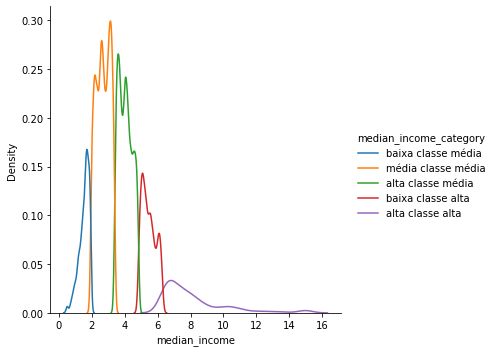

In [32]:
sns.displot(housing, x='median_income', hue='median_income_category', kind='kde')
plt.show()

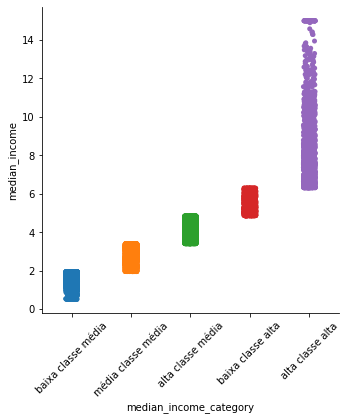

In [33]:
sns.catplot(data=housing, x='median_income_category', y='median_income')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

**Tratamento de dados ausentes**

In [34]:
# Variável: quantidade total de quartos
# Observa as estatísticas
print(stats['total_bedrooms'])

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


In [35]:
# Substitui o valor ausente pela mediana da variável
housing['total_bedrooms'].fillna(stats['total_bedrooms']['50%'], inplace=True)

In [36]:
# Atualiza as estatísticas
stats = housing.describe()
stats.T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,536.838857,419.391878,1.0000,297.0000,435.0000,643.25000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


**Nova variável:** cômodos por morador.

In [37]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['rooms_per_household']

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Name: rooms_per_household, Length: 20640, dtype: float64

In [90]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,populacao_moradores
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.181467


**Exercício:** crie e inclua no conjunto de dados uma nova variável de quartos por cômodo.

In [101]:
housing['quartos_por_comodo'] = housing['total_rooms'] / housing['total_bedrooms']
housing['quartos_por_comodo']

0        6.821705
1        6.418626
2        7.721053
3        5.421277
4        5.810714
           ...   
20635    4.451872
20636    4.646667
20637    4.647423
20638    4.547677
20639    4.521104
Name: quartos_por_comodo, Length: 20640, dtype: float64

**Exercício:** crie e inclua no conjunto de dados uma nova variável de população por moradores.

In [100]:
housing['populacao_moradores'] = housing['population'] / housing['households']
housing['populacao_moradores']

0        2.555556
1        2.109842
2        2.802260
3        2.547945
4        2.181467
           ...   
20635    2.560606
20636    3.122807
20637    2.325635
20638    2.123209
20639    2.616981
Name: populacao_moradores, Length: 20640, dtype: float64

**Variáveis *dummy* para categorias**

In [39]:
housing_dummies = pd.get_dummies(housing[['ocean_proximity', 'median_income_category']])
housing_dummies.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_income_category_baixa classe média,median_income_category_média classe média,median_income_category_alta classe média,median_income_category_baixa classe alta,median_income_category_alta classe alta
0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0


In [40]:
housing = pd.concat([housing, housing_dummies], axis=1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_category,rooms_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_income_category_baixa classe média,median_income_category_média classe média,median_income_category_alta classe média,median_income_category_baixa classe alta,median_income_category_alta classe alta
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,alta classe alta,6.984127,0,0,0,1,0,0,0,0,0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,alta classe alta,6.238137,0,0,0,1,0,0,0,0,0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,alta classe alta,8.288136,0,0,0,1,0,0,0,0,0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,baixa classe alta,5.817352,0,0,0,1,0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,alta classe média,6.281853,0,0,0,1,0,0,0,1,0,0


**Exercício:** trate o outlier identificado no valor mediano dos imóveis.

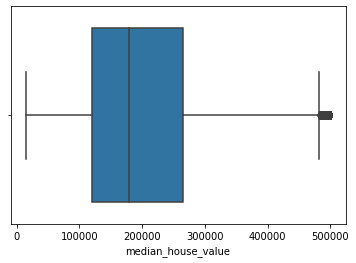

In [41]:
sns.boxplot(housing['median_house_value'])
plt.show()

## Análise dos dados

**Regressão linear**: é uma abordagem linear para a modelagem do relacionamento entre uma variável resposta e uma ou mais variáveis explicativas.

> $Y = X\beta + \mu$, *onde* $\mu\sim N\left(0,\Sigma\right)$

In [42]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'median_income_category',
       'rooms_per_household', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
       'median_income_category_baixa classe média',
       'median_income_category_média classe média',
       'median_income_category_alta classe média',
       'median_income_category_baixa classe alta',
       'median_income_category_alta classe alta'],
      dtype='object')

In [43]:
colunas_remove = ['ocean_proximity', 'median_income_category', 'median_house_value']

In [44]:
# Separa entre variáveis independentes (X) e variável dependente (Y)
X = housing.drop(colunas_remove, axis=1)
y = housing['median_house_value']

In [45]:
# Ajusta o modelo linear aos dados
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Estima o preço para um novo imóvel**

In [46]:
novo_imovel = X.iloc[0:1]
novo_imovel

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_income_category_baixa classe média,median_income_category_média classe média,median_income_category_alta classe média,median_income_category_baixa classe alta,median_income_category_alta classe alta
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0,0,0,1,0,0,0,0,0,1


In [47]:
# Preço estimado
model.predict(novo_imovel)

array([426007.44776848])

In [48]:
# Preço real do exemplo apresentado
y[0]

452600.0